In [48]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import requests
from bs4 import BeautifulSoup

%matplotlib inline

In [35]:
df = pd.read_csv("survey_results_public.csv")

In [36]:
# Display the first few rows of the DataFrame
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [37]:
# Describe the dataset
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [39]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

ResponseId                 0
MainBranch                 0
Employment              1559
RemoteWork             14310
CodingActivities       14369
                       ...  
TrueFalse_2            37553
TrueFalse_3            37519
SurveyLength            2824
SurveyEase              2760
ConvertedCompYearly    35197
Length: 79, dtype: int64


There are a large percentage of missing values in some columns. Therefore, I decide to keep these values missing.

### Visualize the number of developers in each main branch:

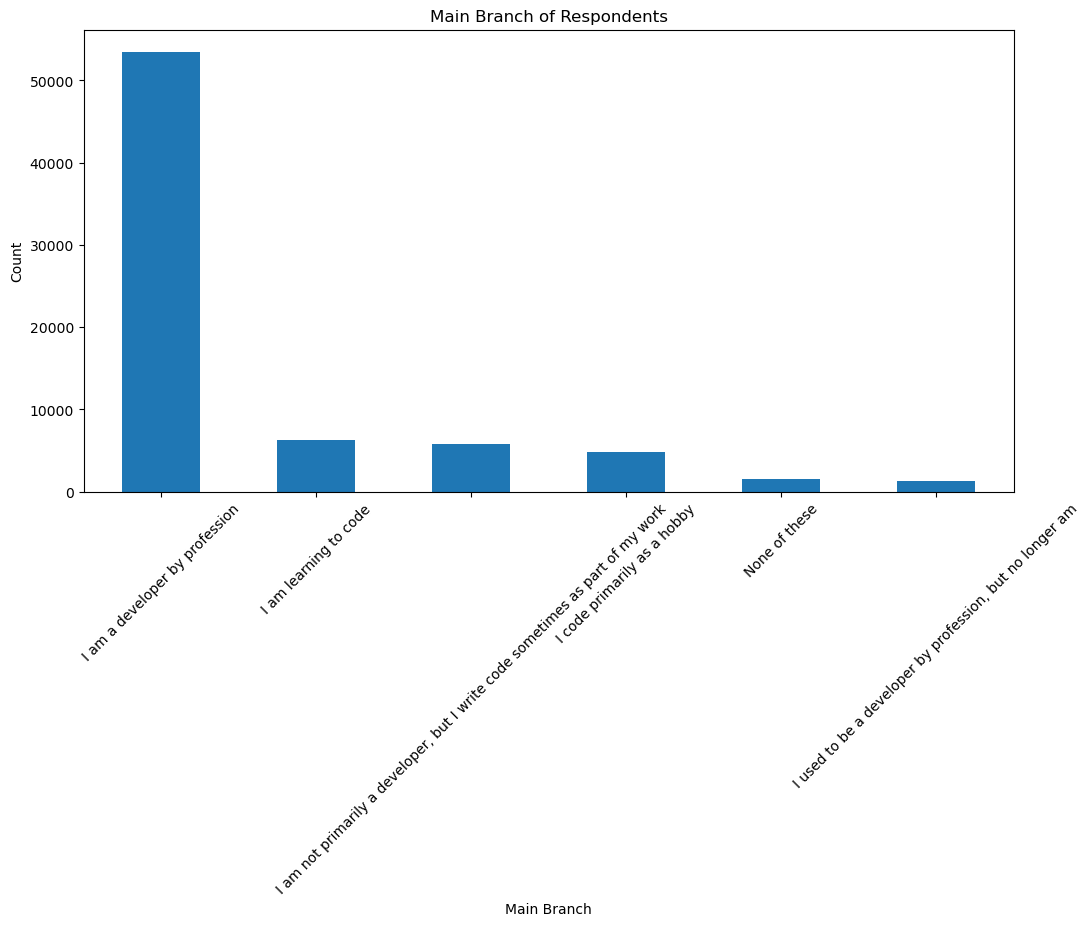

In [40]:
# Count the number of occurrences for each main branch
main_branch_counts = df['MainBranch'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
main_branch_counts.plot(kind='bar')
plt.title('Main Branch of Respondents')
plt.xlabel('Main Branch')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

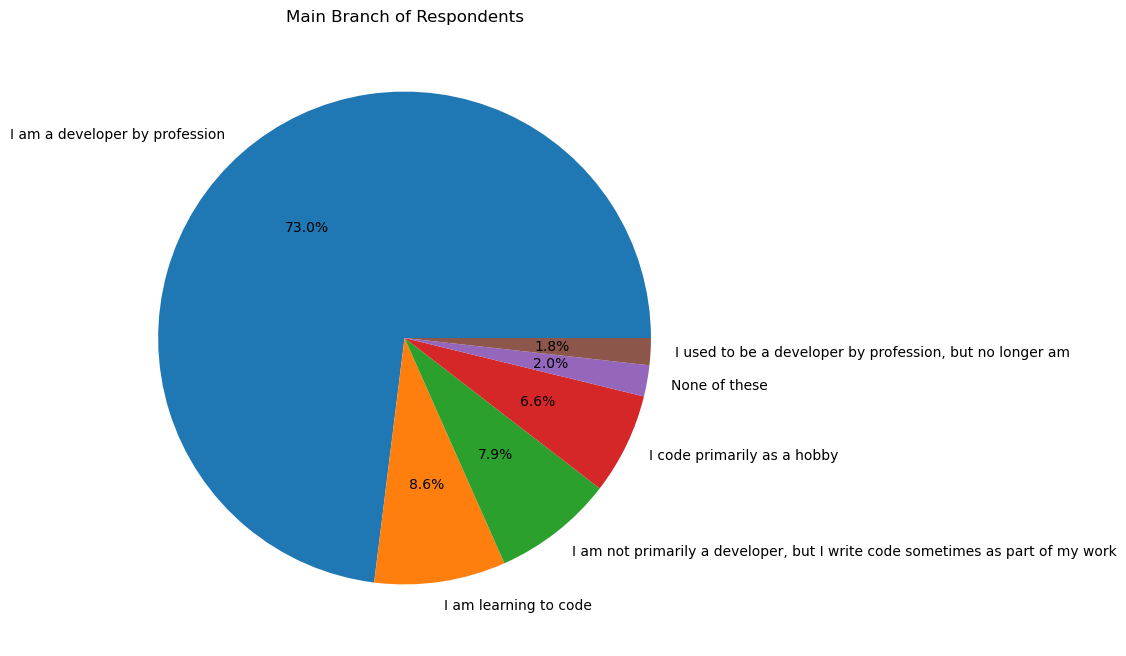

In [41]:
# Count the number of occurrences for each main branch
main_branch_counts = df['MainBranch'].value_counts()

# Create a pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(main_branch_counts, labels=main_branch_counts.index, autopct='%1.1f%%')
plt.title('Main Branch of Respondents')
plt.show()

We can see that the majority (73%) of respondents are professional developer.

### Visualize employment status

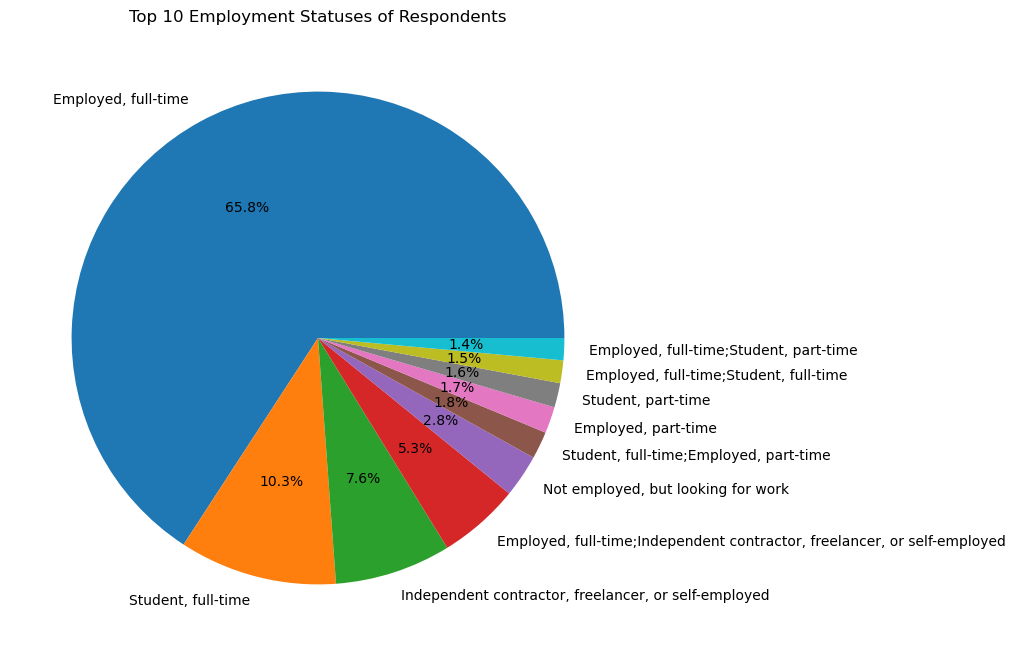

In [42]:
# Count the number of occurrences for each employment status
employment_counts = df['Employment'].value_counts()

# Select the top 10 employment statuses
top_10_employment = employment_counts.head(10)

# Create a pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(top_10_employment, labels=top_10_employment.index, autopct='%1.1f%%')
plt.title('Top 10 Employment Statuses of Respondents')
plt.show()

We can see that most developers work under a full-time contract. The number of those who study full time is also significant.

### Visualize the status of remote work

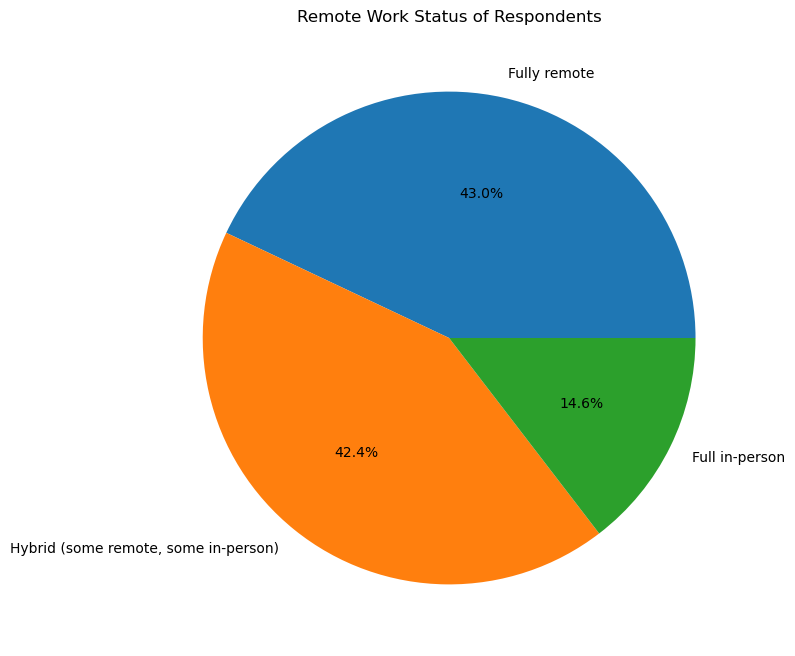

In [43]:
# Count the number of occurrences for each remote work status
remote_work_counts = df['RemoteWork'].value_counts()

# Create a pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(remote_work_counts, labels=remote_work_counts.index, autopct='%1.1f%%')
plt.title('Remote Work Status of Respondents')
plt.show()

We can see that the number of developers who work full remote and hybrid is almost the same. Only a small number of developers work fully in person.

### Where did developers learn to code?

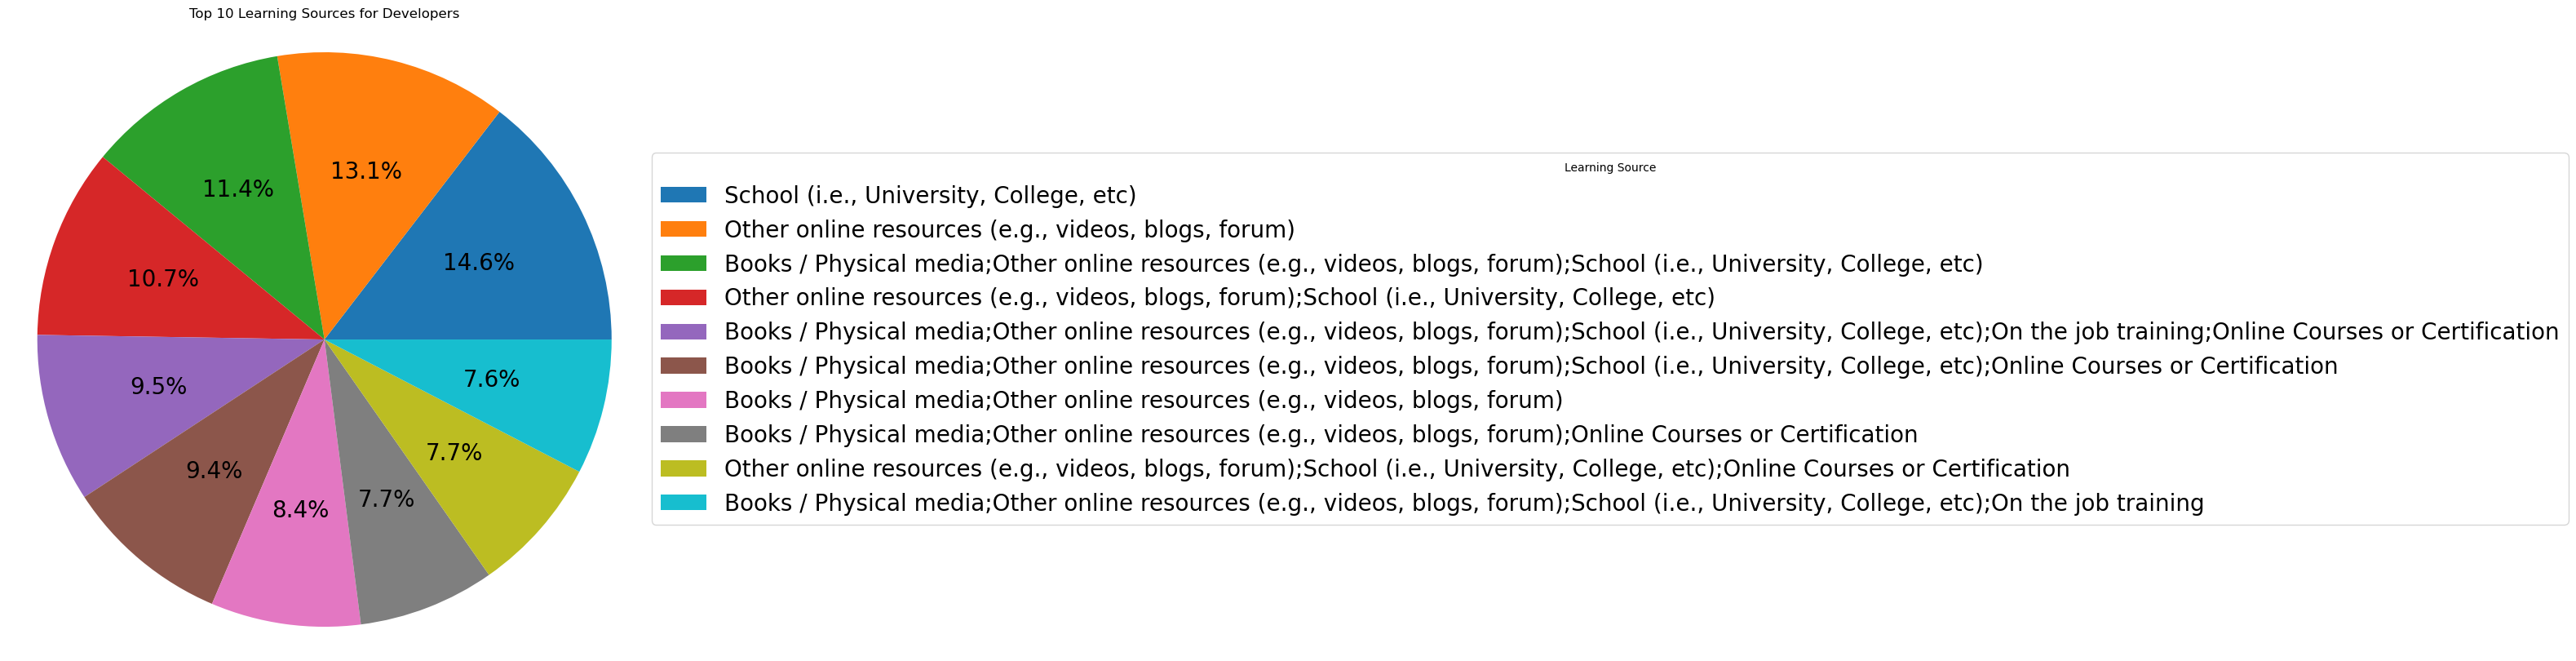

In [44]:
# Count the number of occurrences for each learning source
learn_source_counts = df['LearnCode'].value_counts().head(10)

# Create a pie chart with percentages
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(learn_source_counts, autopct='%1.1f%%')

# Set the aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Add legends with a larger box and bigger text size
plt.legend(learn_source_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Learning Source', prop={'size': 20})

# Add percentage numbers to the pie chart
for autotext in autotexts:
    autotext.set_fontsize(20)

plt.title('Top 10 Learning Sources for Developers')
plt.show()

We can see that developers learn to code from various sources. The top 3 common sources are school, online resources and books.

### Education level of developers

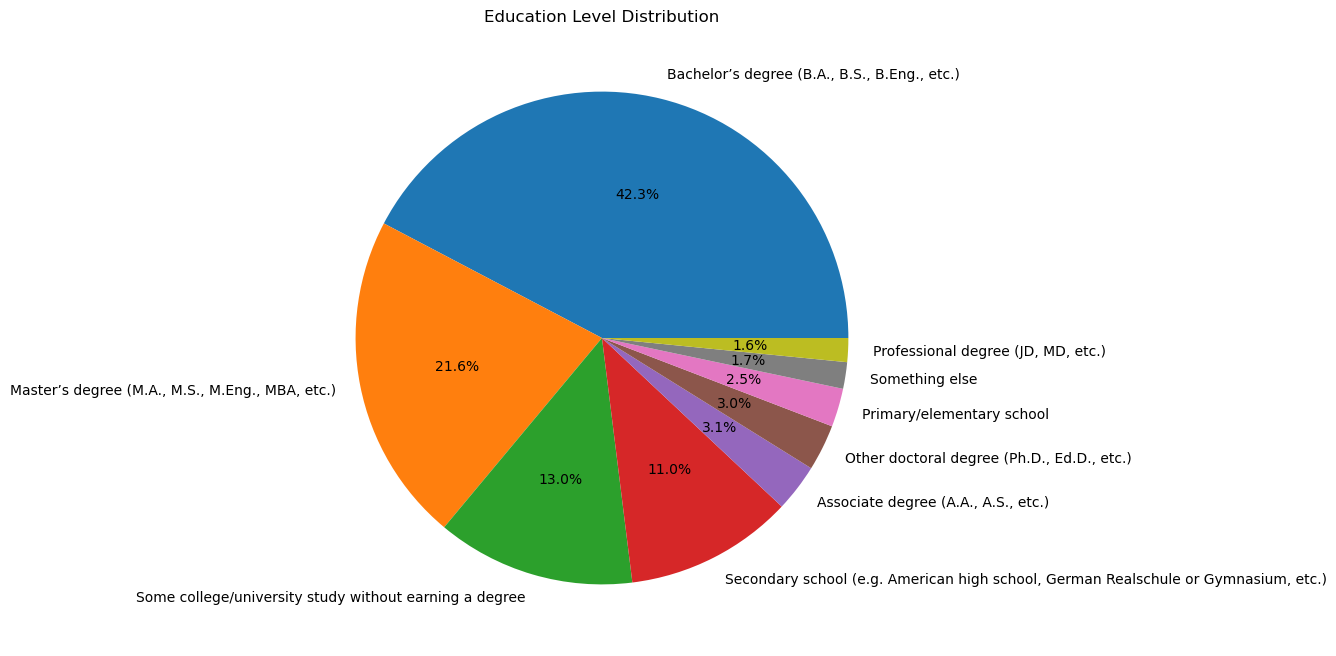

In [94]:
# Count the occurrences of each education level
education_counts = df['EdLevel'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')

plt.title('Education Level Distribution')

plt.show()

We can see that the majority of developers hold a bachelor's degree or master's degree.

### Top countries with Most Developers

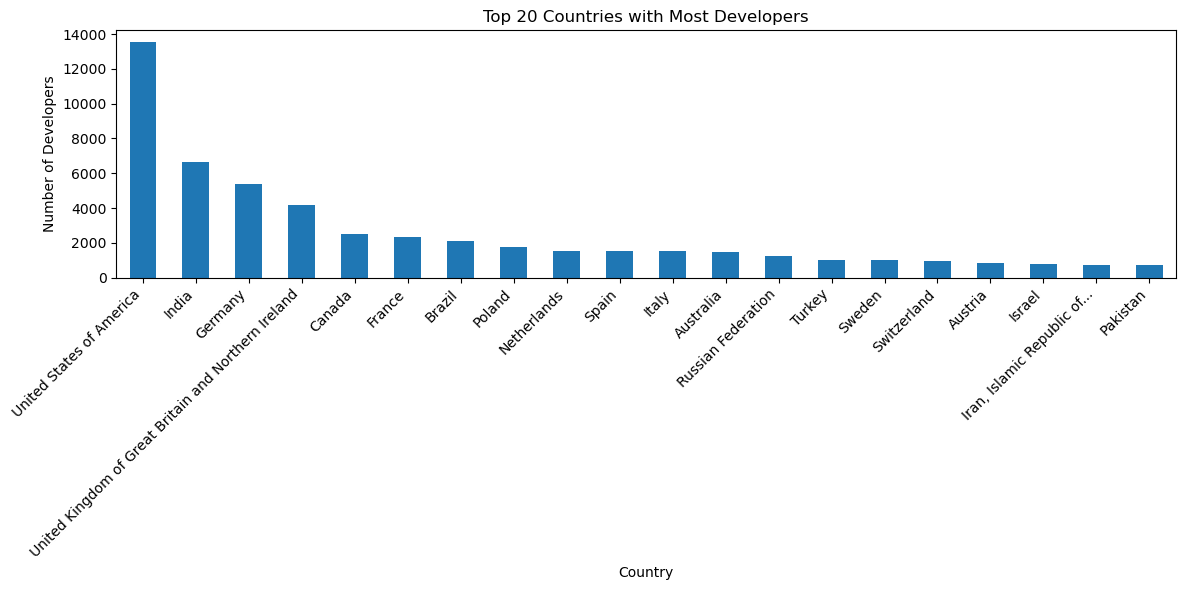

In [45]:
# Count the number of occurrences for each country
country_counts = df['Country'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Top 20 Countries with Most Developers')
plt.xlabel('Country')
plt.ylabel('Number of Developers')

# Adjust the position of x-axis ticks
plt.xticks(range(len(country_counts)), country_counts.index, rotation=45, ha='right')

plt.tight_layout()

plt.show()

It is obvious that USA has most developers, almost double the number of developers working in India.

### Top currenices being used by developers

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14780\46903504.py:17: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


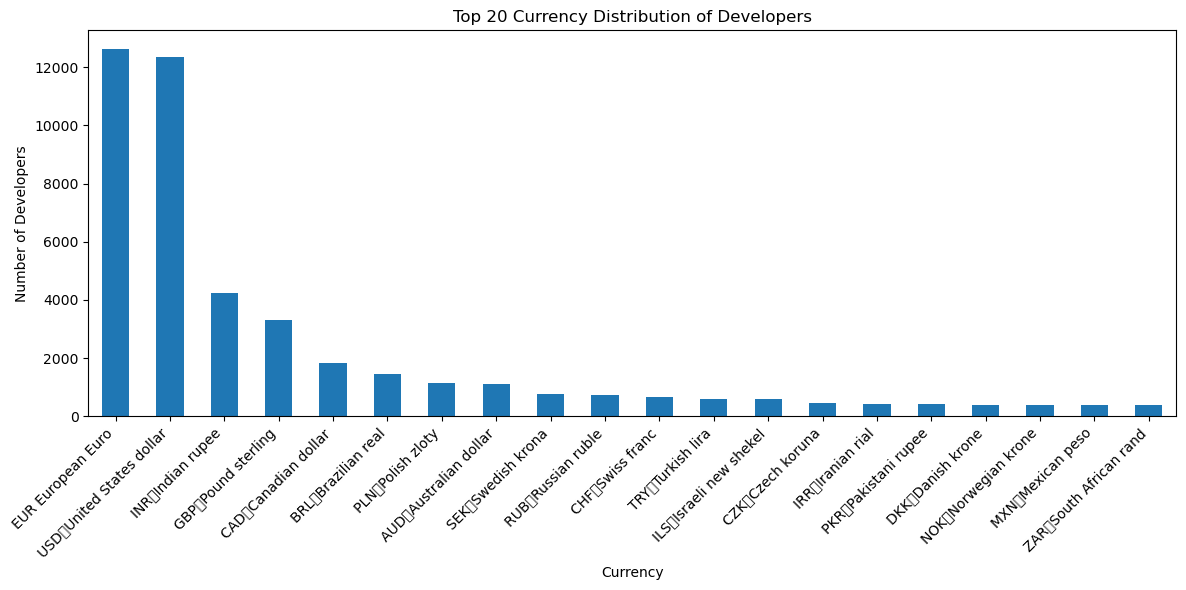

In [46]:
# Filter out rows where Currency is not null
currency_data = df[df['Currency'].notnull()]

# Count the frequency of each currency
currency_counts = currency_data['Currency'].value_counts().head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
currency_counts.plot(kind='bar')
plt.title('Top 20 Currency Distribution of Developers')
plt.xlabel('Currency')
plt.ylabel('Number of Developers')

# Adjust the position of x-axis ticks
plt.xticks(range(len(currency_counts)), currency_counts.index, rotation=45, ha='right')

plt.tight_layout()

plt.show()

### Average income of developers

In [62]:
# Make a request to the ExchangeRate-API to get the latest exchange rates
response = requests.get('https://api.exchangerate-api.com/v4/latest/USD')

# Parse the JSON response
data = response.json()

# Get the exchange rates
exchange_rates = data['rates']

# Print the exchange rates
for currency, rate in exchange_rates.items():
    print(currency, rate)

USD 1
AED 3.67
AFN 86.36
ALL 96.15
AMD 386.16
ANG 1.79
AOA 832.22
ARS 258.91
AUD 1.5
AWG 1.79
AZN 1.7
BAM 1.79
BBD 2
BDT 108.33
BGN 1.79
BHD 0.376
BIF 2811.52
BMD 1
BND 1.35
BOB 6.92
BRL 4.9
BSD 1
BTN 82.68
BWP 13.51
BYN 2.83
BZD 2
CAD 1.33
CDF 2306.66
CHF 0.891
CLP 801.93
CNY 7.23
COP 4138.66
CRC 542.14
CUP 24
CVE 100.84
CZK 21.86
DJF 177.72
DKK 6.82
DOP 55.53
DZD 135.71
EGP 30.85
ERN 15
ETB 54.93
EUR 0.915
FJD 2.21
FKP 0.781
FOK 6.82
GBP 0.78
GEL 2.59
GGP 0.781
GHS 11.61
GIP 0.781
GMD 62.61
GNF 8556.96
GTQ 7.83
GYD 211.31
HKD 7.83
HNL 24.59
HRK 6.89
HTG 138.49
HUF 351.83
IDR 15151.07
ILS 3.7
IMP 0.781
INR 82.68
IQD 1307.48
IRR 41993.94
ISK 134.89
JEP 0.781
JMD 154.58
JOD 0.709
JPY 142.37
KES 140.52
KGS 87.56
KHR 4139.01
KID 1.5
KMF 449.93
KRW 1301.22
KWD 0.307
KYD 0.833
KZT 445.5
LAK 19154.46
LBP 15000
LKR 309.23
LRD 182.41
LSL 18.87
LYD 4.81
MAD 9.77
MDL 18.32
MGA 4519.81
MKD 56.43
MMK 2099.92
MNT 3448.24
MOP 8.06
MRU 34.77
MUR 45.46
MVR 15.43
MWK 1058.56
MXN 17.16
MYR 4.66
MZN 63.9

In [72]:
# Convert the currency values to USD
df['ConvertedCompUSD'] = df['ConvertedCompYearly'] / df['Currency'].str[:3].map(exchange_rates)

# Print the updated DataFrame with USD values
df.head(10)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,ConvertedCompUSD
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0,51544.871795
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0,58170.810811
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
5,6,"I am not primarily a developer, but I write co...","Student, full-time",NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,I code primarily as a hobby,"Student, part-time",NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
7,8,I am a developer by profession,"Not employed, but looking for work",NaN,NaN,Some college/university study without earning ...,Online Courses or Certification,NaN,Coursera;Udemy,1,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
8,9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6,...,Over 120 minutes a day,Somewhat long,Innersource initiative;DevOps function;Microse...,Yes,Yes,Yes,Appropriate in length,Easy,49056.0,53613.114754
9,10,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,37,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN


In [73]:
# Remove rows with missing values in ConvertedCompUSD column
df_clean = df.dropna(subset=['ConvertedCompUSD'])

# Calculate the minimum salary
min_salary = df_clean['ConvertedCompUSD'].min()

# Calculate the maximum salary
max_salary = df_clean['ConvertedCompUSD'].max()

# Calculate the average salary
avg_salary = df_clean['ConvertedCompUSD'].mean()

# Print the results
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)
print("Average Salary:", avg_salary)

Minimum Salary: 4.229284751821341e-05
Maximum Salary: 50000000.0
Average Salary: 156562.5260080679


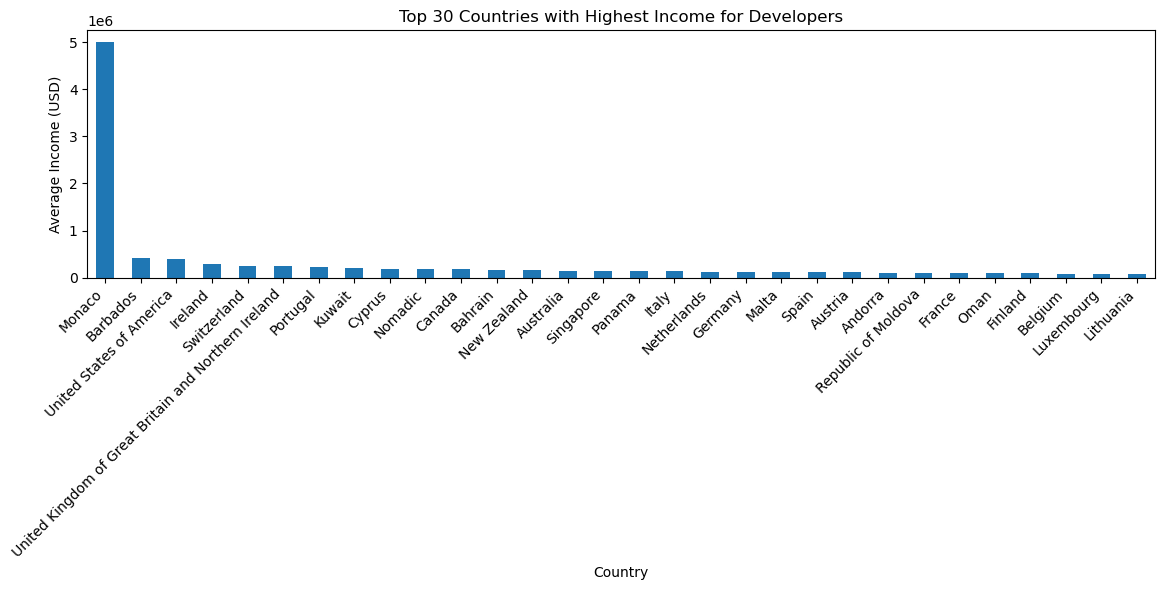

In [81]:
# Group the data by country and calculate the average income
country_income = df.groupby('Country')['ConvertedCompUSD'].mean()

# Sort the values in descending order and select the top 30 countries
top_30_countries = country_income.sort_values(ascending=False).head(30)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_30_countries.plot(kind='bar')
plt.title('Top 30 Countries with Highest Income for Developers')
plt.xlabel('Country')
plt.ylabel('Average Income (USD)')
plt.xticks(rotation=45, ha='right')  # Specify ha='right' for right alignment
plt.tight_layout()
plt.show()

### Most popular programming language

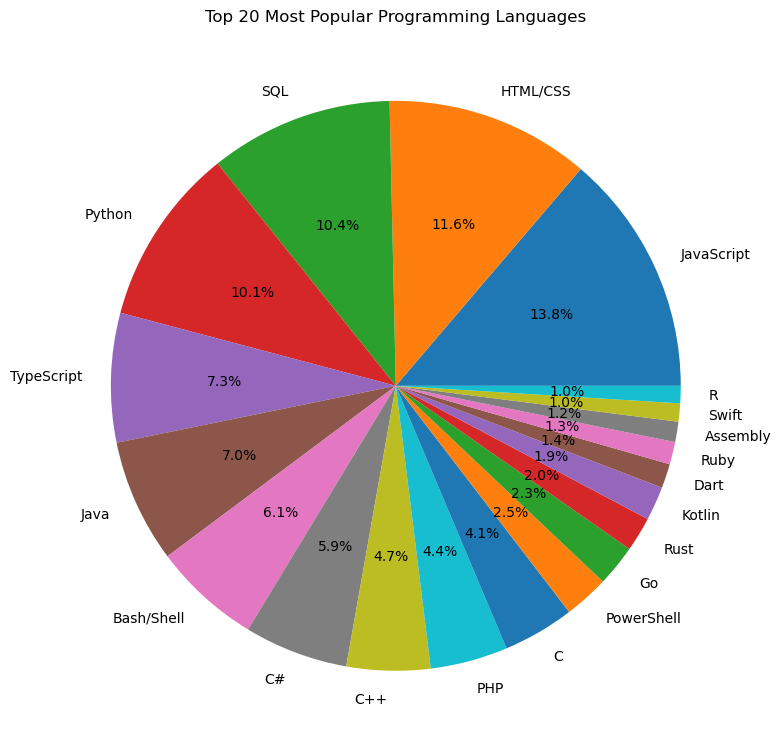

In [85]:
# Count the occurrences of each programming language
language_counts = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()

# Get the top 10 most popular programming languages
top_languages = language_counts.head(20)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_languages, labels=top_languages.index, autopct='%1.1f%%')
plt.title('Top 20 Most Popular Programming Languages')
plt.tight_layout()
plt.show()

Top 4 programming languages are JavaScript, HTML/CSS, SQL, Python

### Age distribution of developers

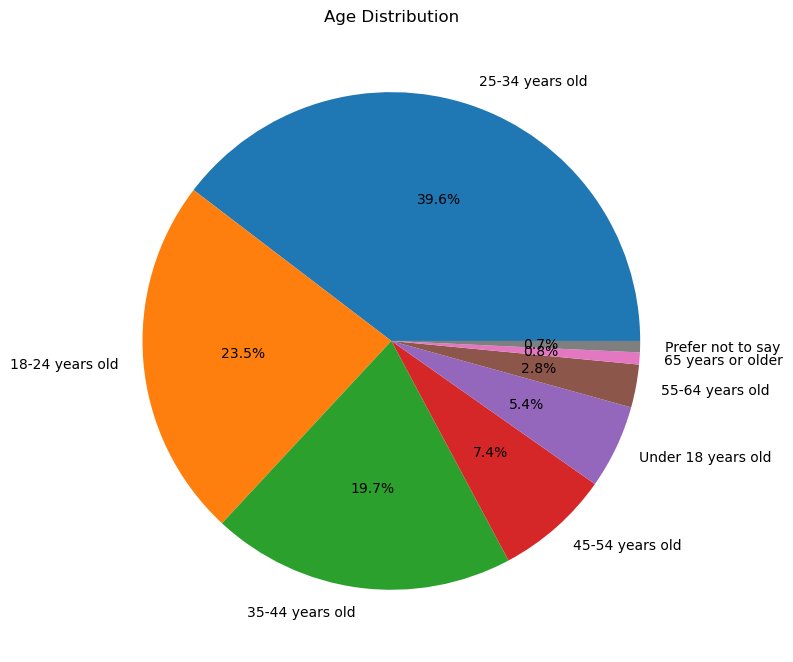

In [86]:
# Count the occurrences of each age group
age_counts = df['Age'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

We can see that 25-34 is the most popular age group, followed by 18-24 and 35-44 groups. The majority of developers are in their young age.

### Gender distribution among developers

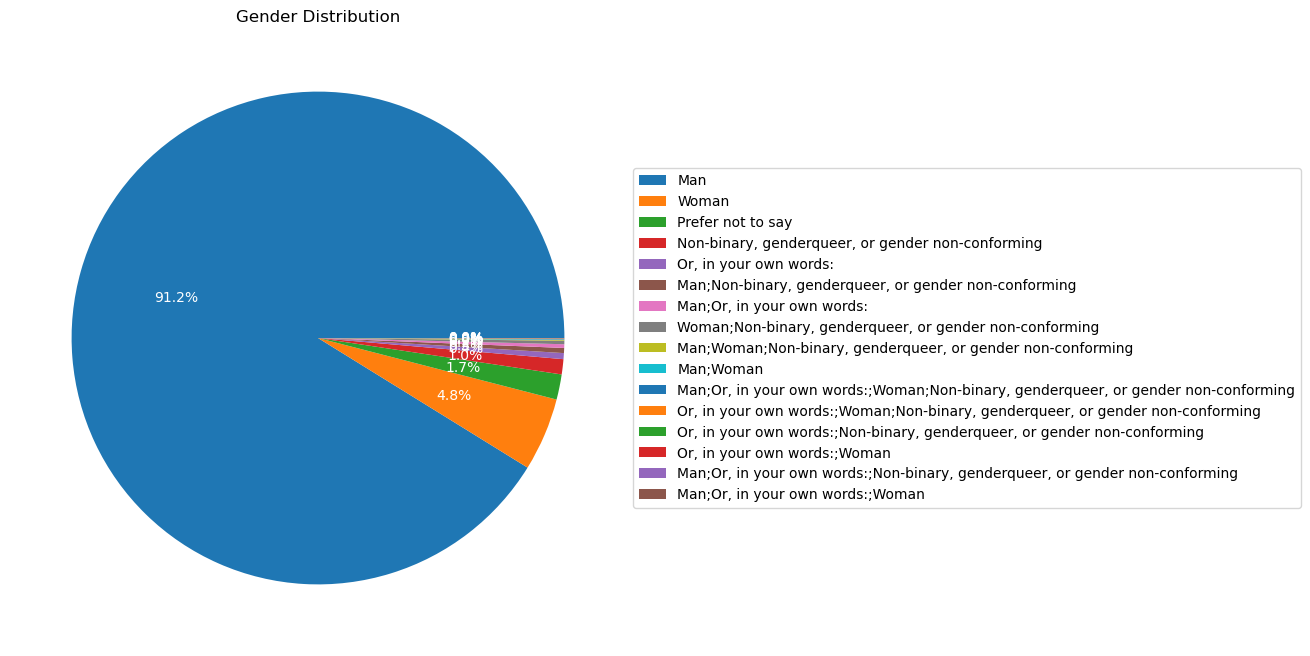

In [88]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, labels, _ = plt.pie(gender_counts, autopct='%1.1f%%', textprops={'color': 'w'})

# Add legends
plt.legend(wedges, gender_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Gender Distribution')
plt.show()

It is obvious that men dominated the industry, only 5% of developers are women.

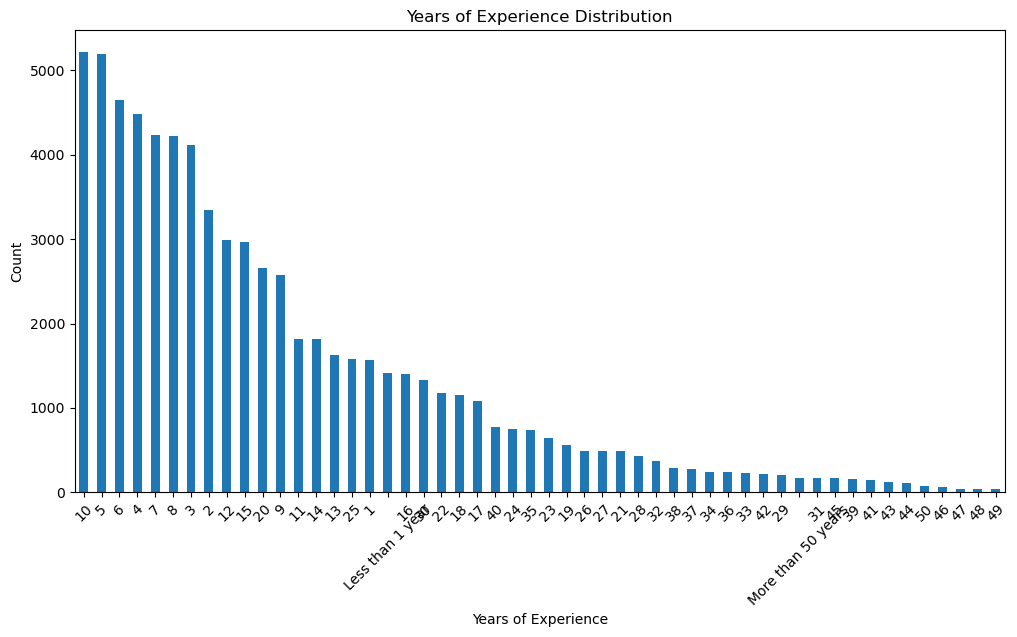

In [93]:
# Count the occurrences of each year of experience
experience_counts = df['YearsCode'].value_counts()

# Sort the counts in descending order of frequency
experience_counts_sorted = experience_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
experience_counts_sorted.plot(kind='bar')

plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

### Is there a difference in income of male and female developers?

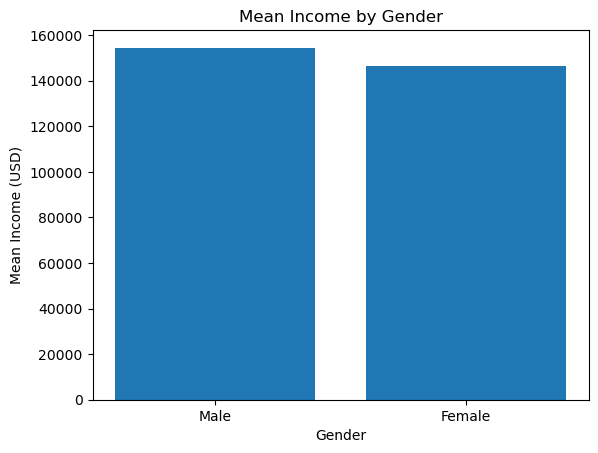

In [97]:
# Calculate the mean income for males and females
male_mean_income = df[df['Gender'] == 'Man']['ConvertedCompUSD'].mean()
female_mean_income = df[df['Gender'] == 'Woman']['ConvertedCompUSD'].mean()

# Create a bar chart
plt.bar(['Male', 'Female'], [male_mean_income, female_mean_income])
plt.title('Mean Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Income (USD)')

# Display the plot
plt.show()

In [96]:
male_mean_income = df[df['Gender'] == 'Man']['ConvertedCompUSD'].mean()
female_mean_income = df[df['Gender'] == 'Woman']['ConvertedCompUSD'].mean()

print("Mean Income - Male: $", male_mean_income)
print("Mean Income - Female: $", female_mean_income)

Mean Income - Male: $ 154471.09399388178
Mean Income - Female: $ 146599.5164375742


We can see that male developers tend to earn higher income. However, the gap between two genders is not significant.